In [1]:
from keras.datasets import imdb
from keras.utils.data_utils import pad_sequences

max_features = 10000
max_len = 500

print("데이터 로드...")
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = max_features)
print(len(x_train), "훈련 시퀀스")
print(len(x_test), "테스트 시퀀스")

print("시퀀스 패딩 (samples x time)")
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)
print("x_train 크기:", x_train.shape)
print("x_test 크기:", x_test.shape)

데이터 로드...
25000 훈련 시퀀스
25000 테스트 시퀀스
시퀀스 패딩 (samples x time)
x_train 크기: (25000, 500)
x_test 크기: (25000, 500)


In [2]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Embedding(max_features, 128, input_length = max_len))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(1))

model.summary()

model.compile(optimizer=RMSprop(lr=1e-4), loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

2022-09-01 16:15:57.298838: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:05:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-09-01 16:15:57.386008: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:05:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-09-01 16:15:57.386412: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:05:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-09-01 16:15:57.387227: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 128)          1280000   
                                                                 
 conv1d (Conv1D)             (None, 494, 32)           28704     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 98, 32)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 92, 32)            7200      
                                                                 
 global_max_pooling1d (Globa  (None, 32)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 1)                 3

ut NUMA support.
2022-09-01 16:15:57.388594: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:05:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-09-01 16:15:57.388893: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:05:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-09-01 16:15:58.405197: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:05:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-09-01 16:15:58.405608: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:05:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-09-01 16:15:58.405624: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616

Epoch 1/10


2022-09-01 16:16:02.132335: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8500
2022-09-01 16:16:03.335050: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-09-01 16:16:03.849111: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


157/157 [==============================] - 8s 23ms/step - loss: 0.8445 - acc: 0.4996 - val_loss: 0.6884 - val_acc: 0.5614
Epoch 2/10
157/157 [==============================] - 3s 20ms/step - loss: 0.6737 - acc: 0.6411 - val_loss: 0.6678 - val_acc: 0.6478
Epoch 3/10
157/157 [==============================] - 3s 21ms/step - loss: 0.6318 - acc: 0.7591 - val_loss: 0.6197 - val_acc: 0.7462
Epoch 4/10
157/157 [==============================] - 3s 20ms/step - loss: 0.5472 - acc: 0.8120 - val_loss: 0.5058 - val_acc: 0.7996
Epoch 5/10
157/157 [==============================] - 3s 20ms/step - loss: 0.4199 - acc: 0.8456 - val_loss: 0.4217 - val_acc: 0.8362
Epoch 6/10
157/157 [==============================] - 3s 20ms/step - loss: 0.3479 - acc: 0.8745 - val_loss: 0.3979 - val_acc: 0.8518
Epoch 7/10
157/157 [==============================] - 3s 20ms/step - loss: 0.3093 - acc: 0.8897 - val_loss: 0.4109 - val_acc: 0.8598
Epoch 8/10
157/157 [==============================] - 3s 20ms/step - loss: 0.277

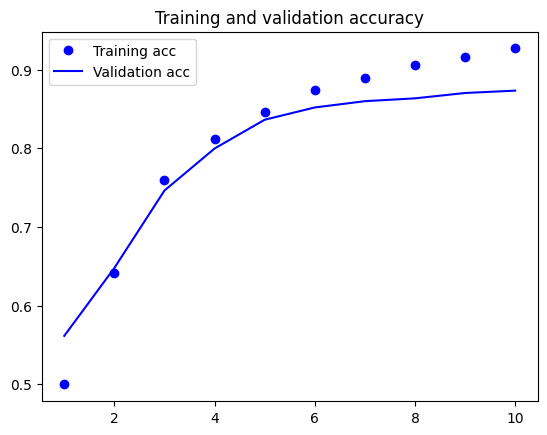

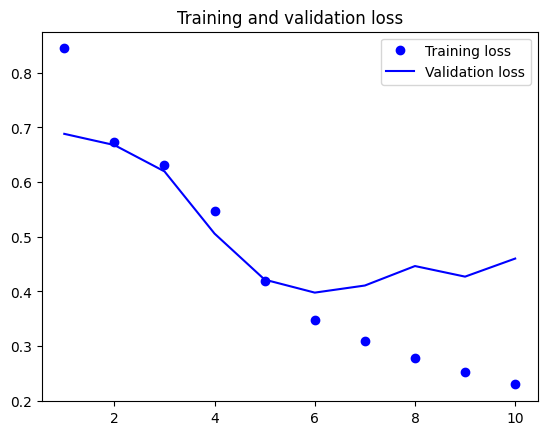

In [4]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()